In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
from ISLP import load_data
Default = load_data('Default')
Default.columns

In [2]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [4]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   default  10000 non-null  category
 1   student  10000 non-null  category
 2   balance  10000 non-null  float64 
 3   income   10000 non-null  float64 
dtypes: category(2), float64(2)
memory usage: 176.1 KB


In [7]:
# Füge Dummy Variablen hinzu für die Zielvariable 'default'
Default = pd.get_dummies(Default, columns=['default'])
Default.head()

,student,balance,income,default_No,default_Yes
0,No,729.526495,44361.625074,True,False
1,Yes,817.180407,12106.134700,True,False
2,No,1073.549164,31767.138947,True,False
3,No,529.250605,35704.493935,True,False
4,No,785.655883,38463.495879,True,False


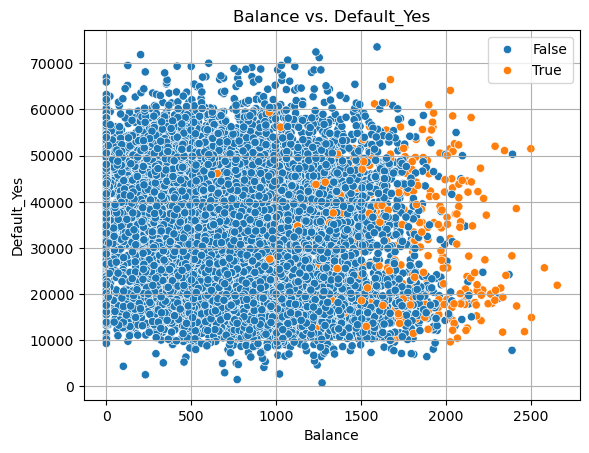

In [78]:
sns.scatterplot(data=Default, x='balance', y='income', hue='default_Yes')

# Add labels and title
plt.xlabel('Balance')
plt.ylabel('Default_Yes')
plt.title(f'Balance vs. Default_Yes')

# Show the legend and plot
plt.legend()
plt.grid()
plt.show()

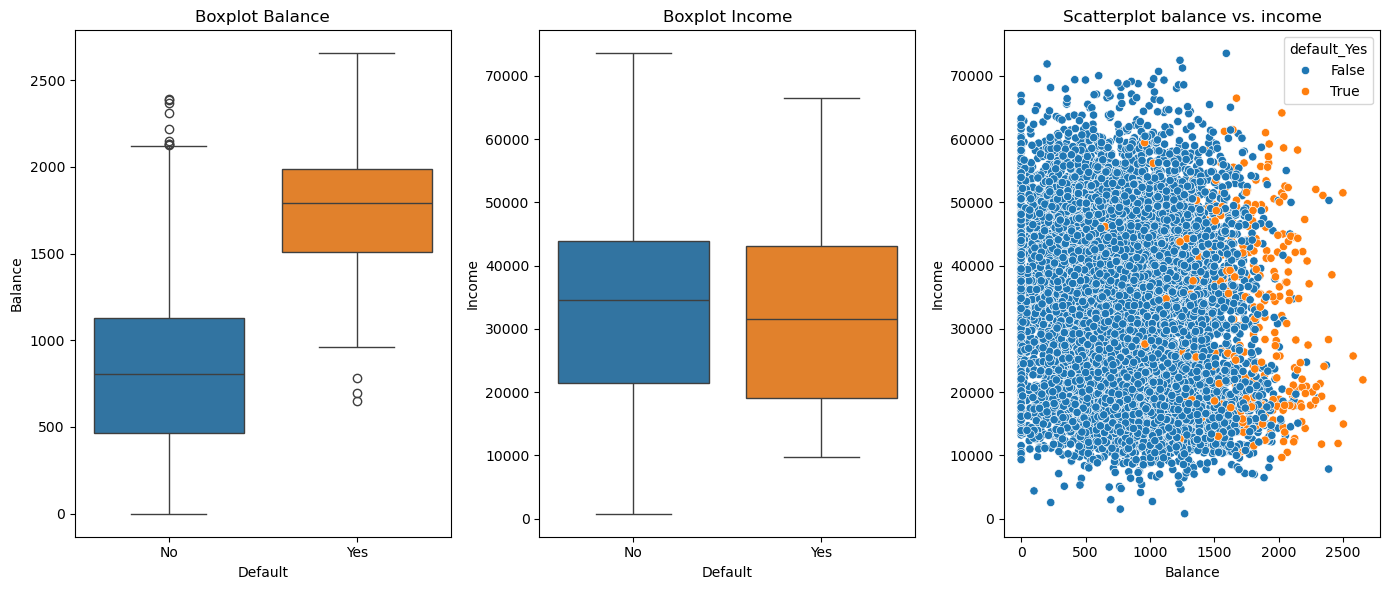

In [79]:

# Erstellen der Subplots (1 Zeile, 3 Spalten)
fig, axes = plt.subplots(1, 3, figsize=(14, 6))

# Boxplot für 'balance' nach 'default'
sns.boxplot(x='default', y='balance', data=df, hue='default', ax=axes[0])
axes[0].set_title('Boxplot Balance')
axes[0].set_xlabel('Default')
axes[0].set_ylabel('Balance')

# Boxplot für 'income' nach 'default'
sns.boxplot(x='default', y='income', data=df, hue='default', ax=axes[1])
axes[1].set_title('Boxplot Income')
axes[1].set_xlabel('Default')
axes[1].set_ylabel('Income')

# Scatterplot für 'income' vs. 'balance' 
sns.scatterplot(data=Default, x='balance', y='income', hue='default_Yes')
axes[2].set_title('Scatterplot balance vs. income')
axes[2].set_xlabel('Balance')
axes[2].set_ylabel('Income')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()


Intercept: -0.07606698714746579
Coefficient for balance: 0.00013080278202817546
Test Mean Squared Error: 0.029665608400674486


/opt/anaconda3/envs/ISLP/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


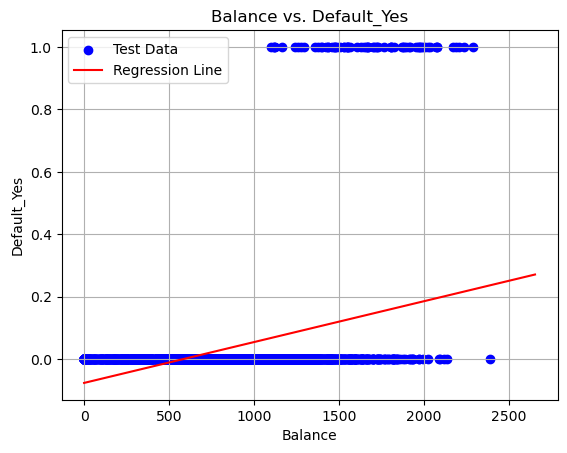

In [81]:
X = Default[['balance']]
y = Default['default_Yes']

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training der Modelle
lr_model = LinearRegression().fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(f"Intercept: {lr_model.intercept_}")
print(f"Coefficient for balance: {lr_model.coef_[0]}")

mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error: {mse}")

# Scatterplot erstellen
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Get the regression line: predict across the range of X values
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_range_pred = lr_model.predict(X_range)


# Plot the regression line
plt.plot(X_range, y_range_pred, color='red', label=f'Regression Line')

# Add labels and title
plt.xlabel('Balance')
plt.ylabel('Default_Yes')
plt.title(f'Balance vs. Default_Yes')

# Show the legend and plot
plt.legend()
plt.grid()
plt.show()

Intercept: [-10.91699983]
Coefficient for balance: [0.00564782]


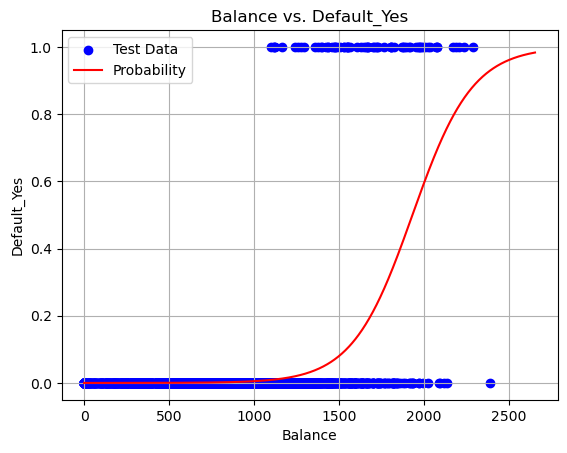

In [118]:
X = Default[['balance']]
y = Default['default_Yes'].map({False: 0, True: 1}) 

# Split data into training and testing sets (using only training set for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training der Modelle
logistic_model = LogisticRegression(penalty=None, random_state=0).fit(X_train, y_train, sample_weight=None)

y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

print(f"Intercept: {logistic_model.intercept_}")
print(f"Coefficient for balance: {logistic_model.coef_[0]}")

# Scatterplot erstellen
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Get the regression line: predict across the range of X values
X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_range = pd.DataFrame(X_range, columns=X_train.columns)
y_range_pred_proba = logistic_model.predict_proba(X_range)[:, 1]
y_range_pred = logistic_model.predict(X_range)

# Plot the regression line
plt.plot(X_range, y_range_pred_proba, color='red', label=f'Probability')

# Labels and title
plt.xlabel('Balance')
plt.ylabel('Default_Yes')
plt.title(f'Balance vs. Default_Yes')

# Show the legend and plot
plt.legend()
plt.grid()
plt.show()

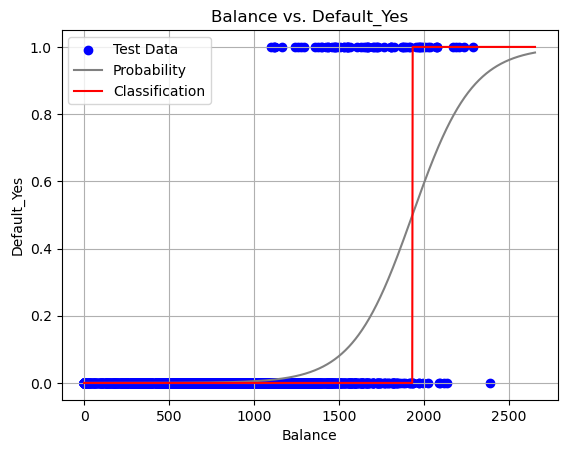

In [104]:
# Scatterplot erstellen
plt.scatter(X_test, y_test, color='blue', label='Test Data')

# Get the regression line: predict across the range of X values
X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_range = pd.DataFrame(X_range, columns=X_train.columns)

# Wahrscheinlichkeit 
y_range_pred_proba = logistic_model.predict_proba(X_range)[:, 1]

# Klasifikation p<=/>0.5
y_range_pred = logistic_model.predict(X_range)


# Plot the regression line
plt.plot(X_range, y_range_pred_proba, color='grey', label=f'Probability')
plt.plot(X_range, y_range_pred, color='red', label=f'Classification')

# Add labels and title
plt.xlabel('Balance')
plt.ylabel('Default_Yes')
plt.title(f'Balance vs. Default_Yes')

# Show the legend and plot
plt.legend()
plt.grid()
plt.show()

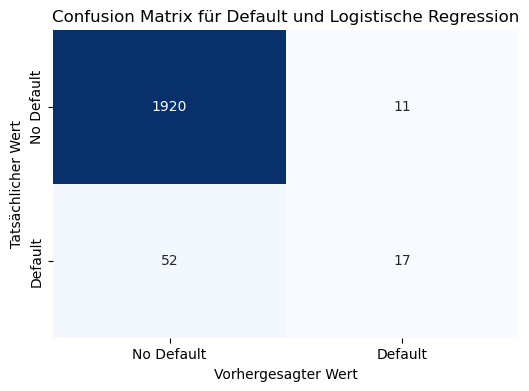

In [105]:
# Berechne die Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Zeichne die Confusion Matrix als Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix für Default und Logistische Regression')
plt.xlabel('Vorhergesagter Wert')
plt.ylabel('Tatsächlicher Wert')
plt.show()

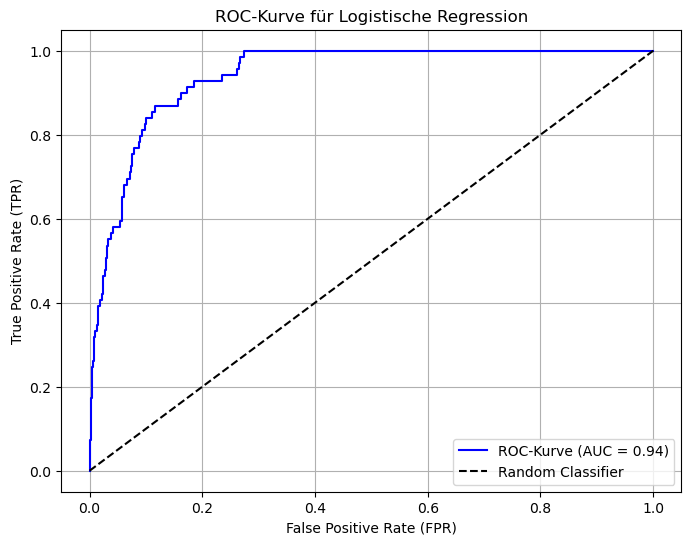

In [120]:

# Berechne die ROC-Kurve (FPR, TPR) für verschiedene Cutoff-Points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Berechne den AUC-Wert (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Zeichne die ROC-Kurve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC-Kurve (AUC = {auc_score:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Diagonale Linie für Zufalls-Klassifikator
plt.title('ROC-Kurve für Logistische Regression')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

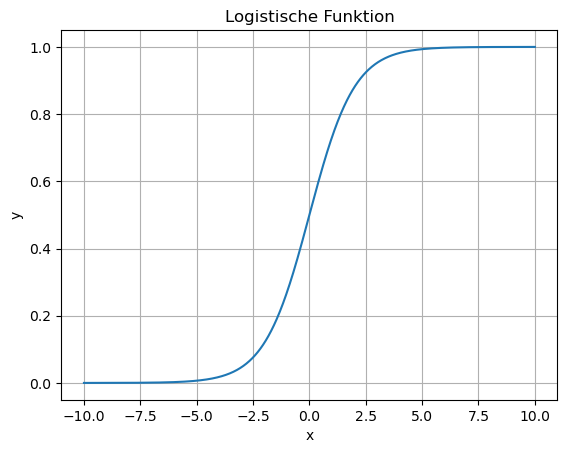

In [95]:
# Logistische Funktion
x = np.linspace(-10, 10, 1000).reshape(-1, 1)
logfkn = 1/(1+np.exp(-x))
exp = np.exp(x)

# Plot Logistische Funktion
plt.plot(x, logfkn)

# Labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Logistische Funktion')

# Show plot
plt.grid()
plt.show()


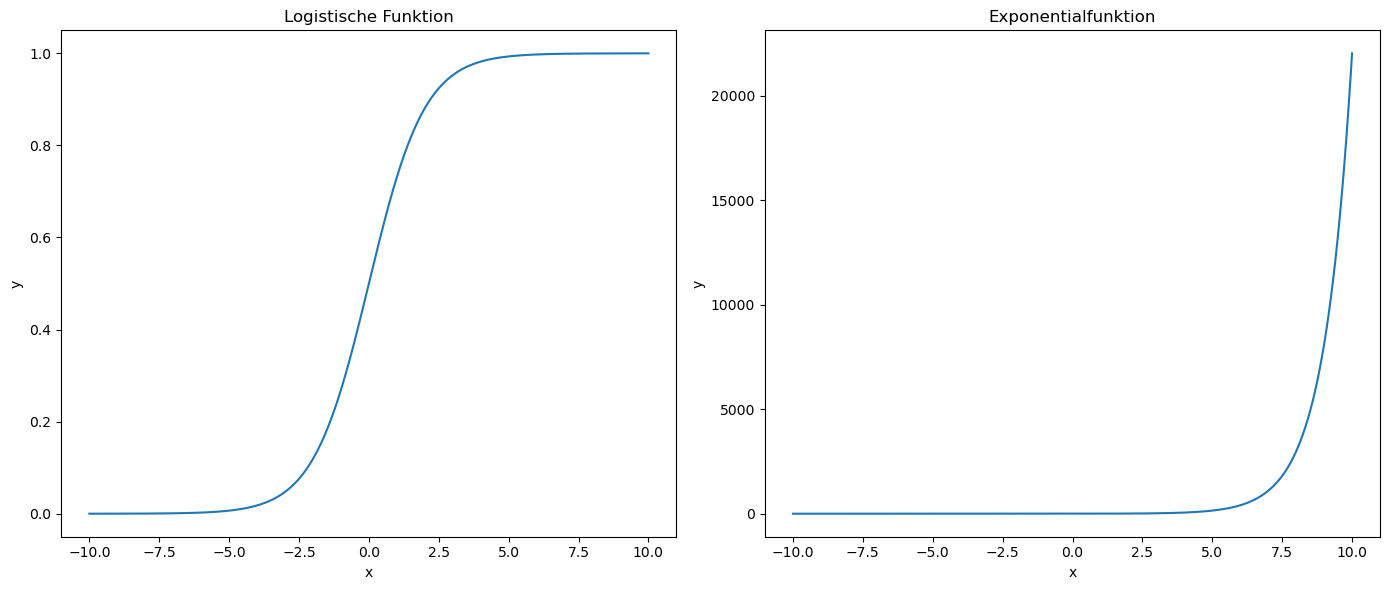

In [102]:
# Logistische Funktion
x = np.linspace(-10, 10, 1000)
logfkn = 1/(1+np.exp(-x))
exp = np.exp(x)

df_exp = pd.DataFrame({'x': x, 'logfkn': logfkn, 'exp': exp})

# Erstellen der Subplots (1 Zeile, 3 Spalten)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot für 'balance' nach 'default'
sns.lineplot(x='x', y='logfkn', data=df_exp, ax=axes[0])
axes[0].set_title('Logistische Funktion')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')

# Boxplot für 'income' nach 'default'
sns.lineplot(x='x', y='exp', data=df_exp, ax=axes[1])
axes[1].set_title('Exponentialfunktion')
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')



# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()